Let us investigate Corinda's Model Strength Estimator implementation in Python:

$\mathfrak{S}(\mathcal{C}, \theta) = (1 - \theta)^a, a = \frac{1}{\log_{10}(\mathcal{C})}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def S(C, theta):
    a = 1/np.log10(C)
    S = np.power((1 - theta), a)
    
    return S

Cmin = 1

print(1/np.log10(Cmin))

inf


/home/bernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


Note that because $\mathcal{C}_{min} = 1$, and therefore $\log_{10}(\mathcal{C}_{min}) = 0$, theoretically $a$ could end up in a division by 0. Fortunately though, Python treats that case by making $a = inf$ and giving us a warning.

In [2]:
N = 100
theta = np.linspace(0, 1, N)

print(S(Cmin, theta))

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


/home/bernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


Also, with the exception of $\mathfrak{S}(1, 0) = (1)^{inf} = 1$, Python assigns $\mathfrak{S}(1, \theta) = (1 - \theta)^{inf} = 0$, also giving a warning. Note that $\mathfrak{S}(1, 0) = 1$ is not problematic though, since a Model that never happens in $\mathcal{M}_{\Gamma}$ is indeed very strong, no matter how small $\mathcal{C}$ is.

Now let's plot a colormap of $\mathfrak{S}(\mathcal{C}, \theta)$:

/home/bernardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


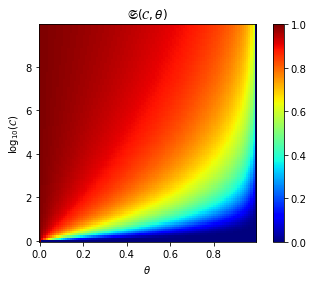

In [3]:
C = np.logspace(0, 10, N, base=10)

S_matrix = np.zeros((N, N))

for x in range(0, N):
    for y in range(0, N):
        S_matrix[y, x] = S(C[y], theta[x])
        
fig, ax = plt.subplots()
        
plt.imshow(S_matrix, cmap='jet', origin='lower')
plt.ylabel('$\log_{10}(\mathcal{C})$')
plt.xlabel('$\\theta$')
plt.title("$\\mathfrak{S}(\mathcal{C}, \\theta)$")

x_labels = ['', '0.0', '0.2', '0.4', '0.6', '0.8']
ax.set_xticklabels(x_labels)
y_labels = ['', '0', '2', '4', '6', '8']
ax.set_yticklabels(y_labels)

plt.colorbar()
fig.savefig('grafico.png', dpi = 300)
plt.show()

